In [19]:
'''
Test notebook to do the import by filesnames and not by creation date
'''

'\nTest notebook to do the import by filesnames and not by creation date\n'

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
import os
import xarray as xr
import pickle
from netCDF4 import Dataset

In [21]:
#create dictionary
dataDict = {}

#names of simulations
name_list = ['az','sg', 'lc', 'na']

#create parameter list
parameters = [
"topographic__elevation",
"soil__depth",
"sediment__flux",
"landform__ID",
"precipitation",
"landform__ID",
"erosion__rate",
"vegetation__density",
'slope_degrees',
'tree_fpc',
'grass_fpc',
'shrub_fpc'
]

for name in name_list:
    dataDict[name] = {}
    for p in parameters:
        dataDict[name][p] = []

path = '/home/mschmid/Desktop/Paper_2_analysis/results/paper_2_results/coupled_vegi_precip/higher_K/'
path_to_output = '/ll_output/NC'

path_list = []
for name in name_list:
    path_list.append(os.path.join(path + name + path_to_output))

In [22]:
elapsed_time_start = 4900000
elapsed_time_end   = 4923000
dt                 = 100
output_start       = 49000
output_end         = 49230
output_array       = np.arange(output_start, output_end, 1)
elapsed_time_array = np.arange(elapsed_time_start, elapsed_time_end, dt)

In [23]:
counter = 0
for name,simu in zip(name_list,path_list):
    for elapsed, output in zip(elapsed_time_array, output_array):

        nc_file_path = os.path.join(simu + f'/output{elapsed}__{output}.nc')
        _dataDump = Dataset(nc_file_path)
        counter += 1

        if counter % 100 == 0:
            print('100 files done')


        for p in parameters:
            _cutDump = _dataDump.variables[p][:][0]
            #delete boundary nodes
            _cutDump = np.delete(_cutDump, 0 , axis = 0) 
            _cutDump = np.delete(_cutDump,-1 , axis = 0)
            _cutDump = np.delete(_cutDump, 0 , axis = 1)
            _cutDump = np.delete(_cutDump,-1 , axis = 1)

            dataDict[name][p].append(_cutDump)


        #print(f'output{elapsed}__{output}.nc')
        
print('All done.')

100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
100 files done
All done.


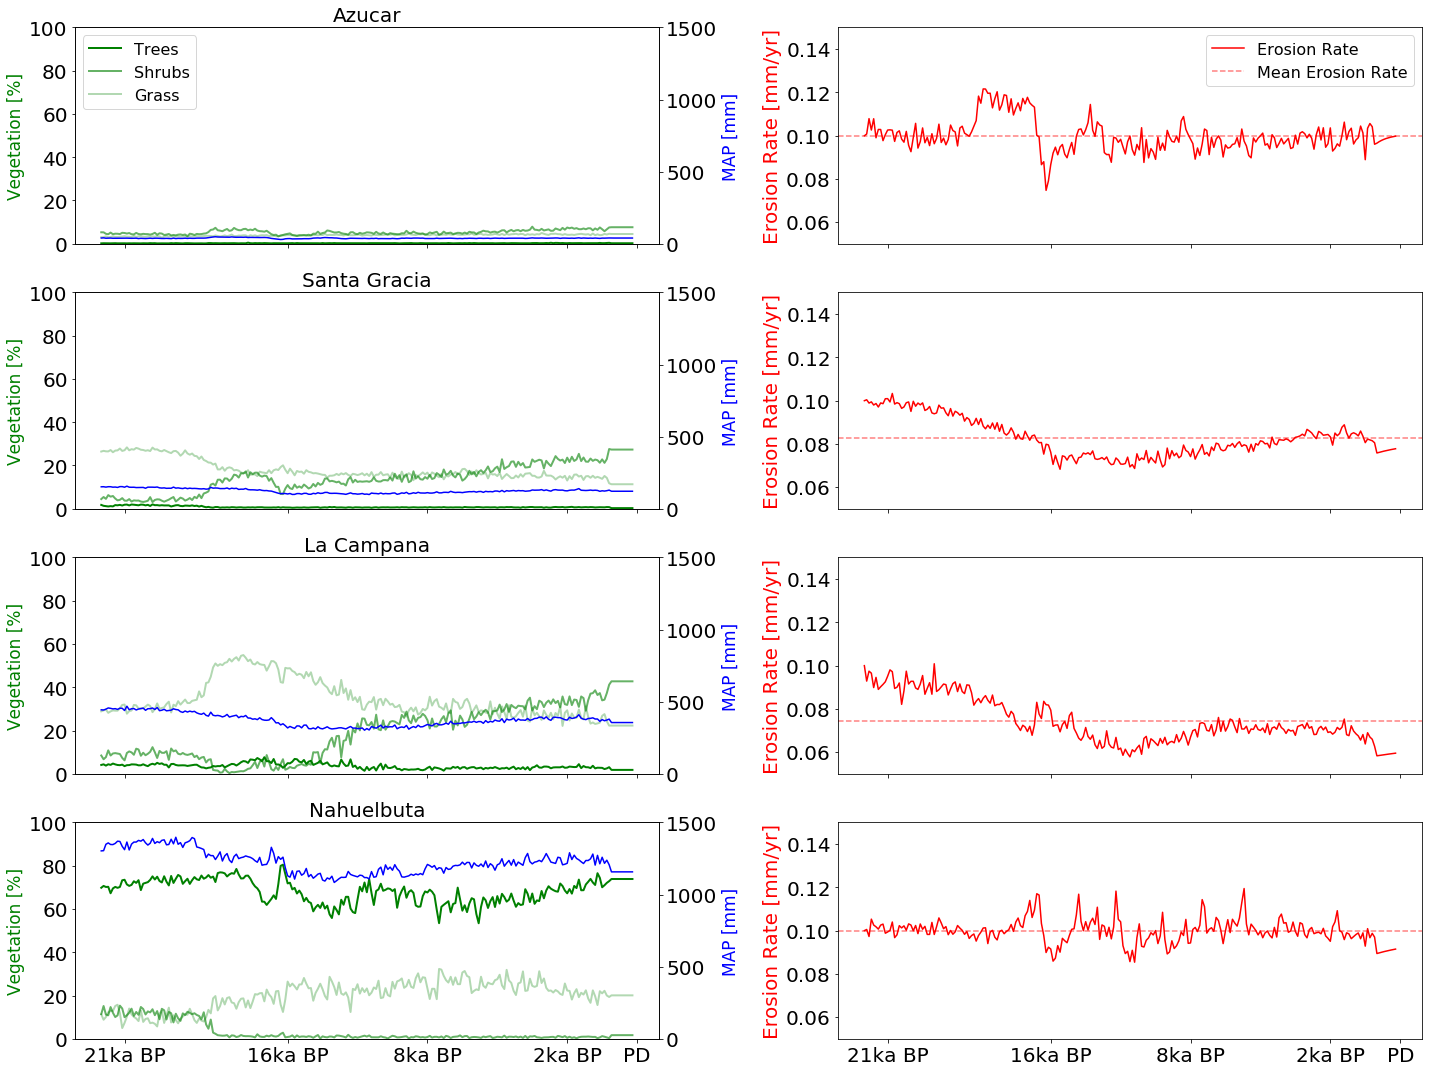

In [227]:
length_of_dataseries = np.shape(dataDict['az']['erosion__rate'])[0]

minV = 0
maxV = -1
azucar_trees  = [np.mean(v)*100 for v in dataDict['az']['tree_fpc']]
azucar_shrubs = [np.mean(v)*100 for v in dataDict['az']['shrub_fpc']]
azucar_grass  = [np.mean(v)*100 for v in dataDict['az']['grass_fpc']]
azucar_soil   = [np.mean(v) for v in dataDict['az']['soil__depth']]
azucar_rain   = [np.mean(v)*10 for v in dataDict['az']['precipitation']]
azucar_erosion= [np.mean(v)*1000 for v in dataDict['az']['erosion__rate']]

azucar_trees  = azucar_trees[minV:maxV]
azucar_shrubs = azucar_shrubs[minV:maxV]
azucar_grass  = azucar_grass[minV:maxV]
azucar_soil   = azucar_soil[minV:maxV]
azucar_rain   = azucar_rain[minV:maxV]
azucar_erosion= azucar_erosion[minV:maxV]

santa_gracia_trees  = [np.mean(v)*100 for v in dataDict['sg']['tree_fpc']]
santa_gracia_shrubs = [np.mean(v)*100 for v in dataDict['sg']['shrub_fpc']]
santa_gracia_grass  = [np.mean(v)*100 for v in dataDict['sg']['grass_fpc']]
santa_gracia_soil   = [np.mean(v) for v in dataDict['sg']['soil__depth']]
santa_gracia_rain   = [np.mean(v)*10 for v in dataDict['sg']['precipitation']]
santa_gracia_erosion= [np.mean(v)*1000 for v in dataDict['sg']['erosion__rate']]

santa_gracia_trees  = santa_gracia_trees[minV:maxV]
santa_gracia_shrubs = santa_gracia_shrubs[minV:maxV]
santa_gracia_grass  = santa_gracia_grass[minV:maxV]
santa_gracia_soil   = santa_gracia_soil[minV:maxV]
santa_gracia_rain   = santa_gracia_rain[minV:maxV]
santa_gracia_erosion= santa_gracia_erosion[minV:maxV]

la_campana_trees  = [np.mean(v)*100 for v in dataDict['lc']['tree_fpc']]
la_campana_shrubs = [np.mean(v)*100 for v in dataDict['lc']['shrub_fpc']]
la_campana_grass  = [np.mean(v)*100 for v in dataDict['lc']['grass_fpc']]
la_campana_soil   = [np.mean(v) for v in dataDict['lc']['soil__depth']]
la_campana_rain   = [np.mean(v)*10 for v in dataDict['lc']['precipitation']]
la_campana_erosion= [np.mean(v)*1000 for v in dataDict['lc']['erosion__rate']]

la_campana_trees  = la_campana_trees[minV:maxV]
la_campana_shrubs = la_campana_shrubs[minV:maxV]
la_campana_grass  = la_campana_grass[minV:maxV]
la_campana_soil   = la_campana_soil[minV:maxV]
la_campana_rain   = la_campana_rain[minV:maxV]
la_campana_erosion= la_campana_erosion[minV:maxV]

nahuelbuta_trees  = [np.mean(v)*100 for v in dataDict['na']['tree_fpc']]
nahuelbuta_shrubs = [np.mean(v)*100 for v in dataDict['na']['shrub_fpc']]
nahuelbuta_grass  = [np.mean(v)*100 for v in dataDict['na']['grass_fpc']]
nahuelbuta_soil   = [np.mean(v) for v in dataDict['na']['soil__depth']]
nahuelbuta_rain   = [np.mean(v)*10 for v in dataDict['na']['precipitation']]
nahuelbuta_erosion= [np.mean(v)*1000 for v in dataDict['na']['erosion__rate']]

nahuelbuta_trees  = nahuelbuta_trees[minV:maxV]
nahuelbuta_shrubs = nahuelbuta_shrubs[minV:maxV]
nahuelbuta_grass  = nahuelbuta_grass[minV:maxV]
nahuelbuta_soil   = nahuelbuta_soil[minV:maxV]
nahuelbuta_rain   = nahuelbuta_rain[minV:maxV]
nahuelbuta_erosion= nahuelbuta_erosion[minV:maxV]


#calculate means


time_vector = np.arange(0, np.shape(azucar_erosion)[0] * 100, 100)



###------------------------------PLOTTING-------------------------------------------#
fig, ax = plt.subplots(4,2, figsize = [20,15], sharex = True)
#--------LEFT SIDE-----------#

#---AZUCAR
ax[0,0].plot(time_vector, azucar_trees,'g' , linewidth = 2 , label = 'Trees', alpha = 1)
ax[0,0].plot(time_vector, azucar_shrubs,'g', linewidth = 2, label = 'Shrubs', alpha = 0.6)
ax[0,0].plot(time_vector, azucar_grass,'g', linewidth = 2, label = 'Grass'  , alpha = 0.3)
ax0 = ax[0,0].twinx()
ax0.plot(time_vector, azucar_rain, 'b')
ax0.set_ylim(0,1500)
ax[0,0].set_ylim(0,100)

#---SANTA GRACIA
ax[1,0].plot(time_vector, santa_gracia_trees, 'g', linewidth = 2, alpha = 1)
ax[1,0].plot(time_vector, santa_gracia_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[1,0].plot(time_vector, santa_gracia_grass, 'g', linewidth = 2, alpha = 0.3)
ax1 = ax[1,0].twinx()
ax1.plot(time_vector, santa_gracia_rain, 'b')
ax1.set_ylim(0,1500)
ax[1,0].set_ylim(0,100)

#---LA CAMPANA
ax[2,0].plot(time_vector, la_campana_trees, 'g', linewidth = 2, alpha = 1)
ax[2,0].plot(time_vector, la_campana_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[2,0].plot(time_vector, la_campana_grass, 'g', linewidth = 2, alpha = 0.3)
ax2 = ax[2,0].twinx()
ax2.plot(time_vector, la_campana_rain, 'b')
ax2.set_ylim(0,1500)
ax[2,0].set_ylim(0,100)

#---NAHUELBUTA
ax[3,0].plot(time_vector, nahuelbuta_trees, 'g', linewidth = 2, alpha = 1)
ax[3,0].plot(time_vector, nahuelbuta_shrubs, 'g', linewidth = 2, alpha = 0.6)
ax[3,0].plot(time_vector, nahuelbuta_grass, 'g', linewidth = 2, alpha = 0.3)
ax3 = ax[3,0].twinx()
ax3.plot(time_vector, nahuelbuta_rain, 'b')
ax3.set_ylim(0,1500)


ax[3,0].set_ylim(0,100)

#legend
ax[0,0].legend(fontsize = 16, loc = 'upper left')

#labels
ax[0,0].set_title('Azucar', fontsize = 20)
ax[1,0].set_title('Santa Gracia', fontsize = 20)
ax[2,0].set_title('La Campana', fontsize = 20)
ax[3,0].set_title('Nahuelbuta', fontsize = 20)

ax[0,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[1,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[2,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')
ax[3,0].set_ylabel('Vegetation [%]', fontsize = 17, color = 'green')

ax0.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax1.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax2.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
ax3.set_ylabel('MAP [mm]', fontsize = 17, color = 'blue')
                   
                   
ax[0,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[1,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[2,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')
ax[3,1].set_ylabel('Erosion Rate [mm/yr]', fontsize = 20, color = 'red')



#formatting
ax[0,0].axes.tick_params(labelsize = 20)
ax[1,0].axes.tick_params(labelsize = 20)
ax[2,0].axes.tick_params(labelsize = 20)
ax[3,0].axes.tick_params(labelsize = 20)
ax[0,1].axes.tick_params(labelsize = 20)
ax[1,1].axes.tick_params(labelsize = 20)
ax[2,1].axes.tick_params(labelsize = 20)
ax[3,1].axes.tick_params(labelsize = 20)
ax0.axes.tick_params(labelsize = 20)
ax1.axes.tick_params(labelsize = 20)
ax2.axes.tick_params(labelsize = 20)
ax3.axes.tick_params(labelsize = 20)

x1 = [1000, 8000, 14000, 20000, 23000]
labels = ['21ka BP','16ka BP','8ka BP','2ka BP', 'PD']
ax[3,0].set_xticks(x1)
ax[3,0].set_xticklabels(labels)
ax[3,1].set_xticks(x1)
ax[3,1].set_xticklabels(labels)

#--------RIGHT SIDE----------#
#---AZUCAR
ax[0,1].plot(time_vector, azucar_erosion, 'r', linewidth = 1.5, label = 'Erosion Rate')
ax[0,1].set_ylim(0.05, 0.15)
ax[0,1].axhline(np.mean(azucar_erosion), color = 'red', alpha = 0.5, linestyle = '--', label = 'Mean Erosion Rate')
ax[0,1].legend(fontsize = 16)
#---SANTA GRACIA
ax[1,1].plot(time_vector, santa_gracia_erosion, 'r', linewidth = 1.5)
ax[1,1].set_ylim(0.05, 0.15)
ax[1,1].axhline(np.mean(santa_gracia_erosion), color = 'red', alpha = 0.5, linestyle = '--')
#---LA CAMPANA
ax[2,1].plot(time_vector, la_campana_erosion, 'r', linewidth = 1.5)
ax[2,1].set_ylim(0.05, 0.15)
ax[2,1].axhline(np.mean(la_campana_erosion), color = 'red', alpha = 0.5, linestyle = '--')
#---NAHUELBUTA
ax[3,1].plot(time_vector, nahuelbuta_erosion, 'r', linewidth = 1.5)
ax[3,1].set_ylim(0.05, 0.15)
ax[3,1].axhline(np.mean(nahuelbuta_erosion), color = 'red', alpha = 0.5, linestyle = '--')



plt.tight_layout()

plt.savefig('erosion_rates_per_area.png')

### Correlation Coefficients
#### Timeseries

In [90]:
azucar_erosion_trees_correff  = []
azucar_erosion_shrubs_correff = []
azucar_erosion_grass_correff  = []
azucar_erosion_rain_correff   = []

santa_gracia_erosion_trees_correff  = []
santa_gracia_erosion_shrubs_correff = []
santa_gracia_erosion_grass_correff  = []
santa_gracia_erosion_rain_correff   = []

la_campana_erosion_trees_correff  = []
la_campana_erosion_shrubs_correff = []
la_campana_erosion_grass_correff  = []
la_campana_erosion_rain_correff   = []

nahuelbuta_erosion_trees_correff  = []
nahuelbuta_erosion_shrubs_correff = []
nahuelbuta_erosion_grass_correff  = []
nahuelbuta_erosion_rain_correff   = []

ws = 230

for i in np.arange(0, len(azucar_erosion), 10):
    
    print(f'Intervall is from {i} to {i+10}')
    
    azucar_erosion_trees_correff.append(np.corrcoef( azucar_trees[i:i+ws],  azucar_erosion[i:i+ws])[0][1])
    azucar_erosion_shrubs_correff.append(np.corrcoef(azucar_shrubs[i:i+ws], azucar_erosion[i:i+ws])[0][1])
    azucar_erosion_grass_correff.append(np.corrcoef( azucar_grass[i:i+ws],  azucar_erosion[i:i+ws])[0][1])
    azucar_erosion_rain_correff.append(np.corrcoef(  azucar_rain[i:i+ws],   azucar_erosion[i:i+ws])[0][1])
    
    santa_gracia_erosion_trees_correff.append(np.corrcoef( santa_gracia_trees[i:i+ws],  santa_gracia_erosion[i:i+ws])[0][1])
    santa_gracia_erosion_shrubs_correff.append(np.corrcoef(santa_gracia_shrubs[i:i+ws], santa_gracia_erosion[i:i+ws])[0][1])
    santa_gracia_erosion_grass_correff.append(np.corrcoef( santa_gracia_grass[i:i+ws],  santa_gracia_erosion[i:i+ws])[0][1])
    santa_gracia_erosion_rain_correff.append(np.corrcoef(  santa_gracia_rain[i:i+ws],   santa_gracia_erosion[i:i+ws])[0][1])
    
    la_campana_erosion_trees_correff.append(np.corrcoef( la_campana_trees[i:i+ws],   la_campana_erosion[i:i+ws])[0][1])
    la_campana_erosion_shrubs_correff.append(np.corrcoef(la_campana_shrubs[i:i+ws],  la_campana_erosion[i:i+ws])[0][1])
    la_campana_erosion_grass_correff.append(np.corrcoef( la_campana_grass[i:i+ws],   la_campana_erosion[i:i+ws])[0][1])
    la_campana_erosion_rain_correff.append(np.corrcoef(  la_campana_rain[i:i+ws],    la_campana_erosion[i:i+ws])[0][1])
    
    nahuelbuta_erosion_trees_correff.append(np.corrcoef( nahuelbuta_trees[i:i+ws],  nahuelbuta_erosion[i:i+ws])[0][1])
    nahuelbuta_erosion_shrubs_correff.append(np.corrcoef(nahuelbuta_shrubs[i:i+ws], nahuelbuta_erosion[i:i+ws])[0][1])
    nahuelbuta_erosion_grass_correff.append(np.corrcoef( nahuelbuta_grass[i:i+ws],  nahuelbuta_erosion[i:i+ws])[0][1])
    nahuelbuta_erosion_rain_correff.append(np.corrcoef(  nahuelbuta_rain[i:i+ws],   nahuelbuta_erosion[i:i+ws])[0][1])

Intervall is from 0 to 10
Intervall is from 10 to 20
Intervall is from 20 to 30
Intervall is from 30 to 40
Intervall is from 40 to 50
Intervall is from 50 to 60
Intervall is from 60 to 70
Intervall is from 70 to 80
Intervall is from 80 to 90
Intervall is from 90 to 100
Intervall is from 100 to 110
Intervall is from 110 to 120
Intervall is from 120 to 130
Intervall is from 130 to 140
Intervall is from 140 to 150
Intervall is from 150 to 160
Intervall is from 160 to 170
Intervall is from 170 to 180
Intervall is from 180 to 190
Intervall is from 190 to 200
Intervall is from 200 to 210
Intervall is from 210 to 220
Intervall is from 220 to 230


/home/mschmid/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mschmid/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


#### Total Correlation Coefficients

In [99]:
azucar_erosion_trees_correff_total  = np.corrcoef(azucar_erosion, azucar_trees)[0][1]
azucar_erosion_shrubs_correff_total = np.corrcoef(azucar_erosion, azucar_shrubs)[0][1]
azucar_erosion_grass_correff_total  = np.corrcoef(azucar_erosion, azucar_grass)[0][1]
azucar_erosion_rain_correff_total   = np.corrcoef(azucar_erosion, azucar_rain)[0][1]

santa_gracia_erosion_trees_correff_total  = np.corrcoef(santa_gracia_erosion, santa_gracia_trees)[0][1]
santa_gracia_erosion_shrubs_correff_total = np.corrcoef(santa_gracia_erosion, santa_gracia_shrubs)[0][1]
santa_gracia_erosion_grass_correff_total  = np.corrcoef(santa_gracia_erosion, santa_gracia_grass)[0][1]
santa_gracia_erosion_rain_correff_total   = np.corrcoef(santa_gracia_erosion, santa_gracia_rain)[0][1]

la_campana_erosion_trees_correff_total  = np.corrcoef(la_campana_erosion, la_campana_trees)[0][1]
la_campana_erosion_shrubs_correff_total = np.corrcoef(la_campana_erosion, la_campana_shrubs)[0][1]
la_campana_erosion_grass_correff_total  = np.corrcoef(la_campana_erosion, la_campana_grass)[0][1]
la_campana_erosion_rain_correff_total   = np.corrcoef(la_campana_erosion, la_campana_rain)[0][1]

nahuelbuta_erosion_trees_correff_total  = np.corrcoef(nahuelbuta_erosion, nahuelbuta_trees)[0][1]
nahuelbuta_erosion_shrubs_correff_total = np.corrcoef(nahuelbuta_erosion, nahuelbuta_shrubs)[0][1]
nahuelbuta_erosion_grass_correff_total  = np.corrcoef(nahuelbuta_erosion, nahuelbuta_grass)[0][1]
nahuelbuta_erosion_rain_correff_total   = np.corrcoef(nahuelbuta_erosion, nahuelbuta_rain)[0][1]


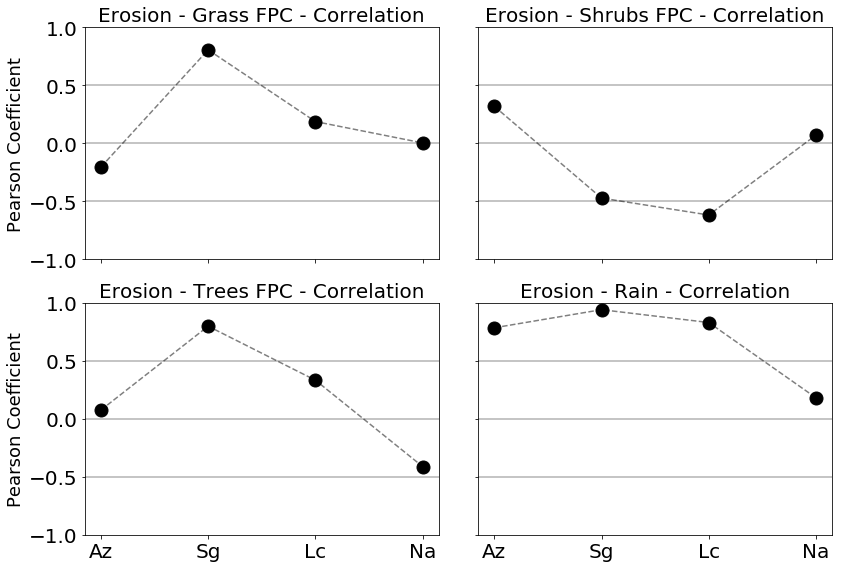

In [230]:
x1 = [0, 1, 2, 3]
x1_labels = ['Az', 'Sg', 'Lc', 'Na']

erosion_tree_correff = [azucar_erosion_trees_correff_total,
                        santa_gracia_erosion_trees_correff_total,
                        la_campana_erosion_trees_correff_total,
                        nahuelbuta_erosion_trees_correff_total]

erosion_grass_correff = [azucar_erosion_grass_correff_total,
                        santa_gracia_erosion_grass_correff_total,
                        la_campana_erosion_grass_correff_total,
                        nahuelbuta_erosion_grass_correff_total]

erosion_shrubs_correff = [azucar_erosion_shrubs_correff_total,
                        santa_gracia_erosion_shrubs_correff_total,
                        la_campana_erosion_shrubs_correff_total,
                        nahuelbuta_erosion_shrubs_correff_total]

erosion_rain_correff = [azucar_erosion_rain_correff_total,
                        santa_gracia_erosion_rain_correff_total,
                        la_campana_erosion_rain_correff_total,
                        nahuelbuta_erosion_rain_correff_total]

fix, ax = plt.subplots(nrows = 2,
                       ncols = 2,
                      figsize = [12,8],
                      sharey = True,
                      sharex = True)
ax[0,0].plot(x1, erosion_grass_correff, 'ok', markersize = 13)
ax[0,0].plot(x1, erosion_grass_correff, 'k--', alpha = 0.5)
ax[0,0].set_title('Erosion - Grass FPC - Correlation', fontsize = 20)

ax[0,1].plot(x1, erosion_shrubs_correff, 'ok', markersize = 13)
ax[0,1].plot(x1, erosion_shrubs_correff, 'k--', alpha = 0.5)
ax[0,1].set_title('Erosion - Shrubs FPC - Correlation', fontsize = 20)

ax[1,0].plot(x1, erosion_tree_correff, 'ok', markersize = 13)
ax[1,0].plot(x1, erosion_tree_correff, 'k--', alpha = 0.5)
ax[1,0].set_title('Erosion - Trees FPC - Correlation', fontsize = 20)

ax[1,1].plot(x1, erosion_rain_correff, 'ok', markersize = 13)
ax[1,1].plot(x1, erosion_rain_correff, 'k--', alpha = 0.5)
ax[1,1].set_title('Erosion - Rain - Correlation', fontsize = 20)


for axs in ax.flatten():
    axs.axes.tick_params(labelsize = 20)
    axs.set_ylim(-1, 1)
    axs.set_xticks(x1)
    axs.set_xticklabels(x1_labels)
    axs.axhline(0,    color = 'black', alpha = 0.3)
    axs.axhline(0.5,  color = 'black', alpha = 0.3)
    axs.axhline(-0.5, color = 'black', alpha = 0.3)
ax[0,0].set_ylabel('Pearson Coefficient', fontsize = 18)
ax[1,0].set_ylabel('Pearson Coefficient', fontsize = 18)

plt.tight_layout()

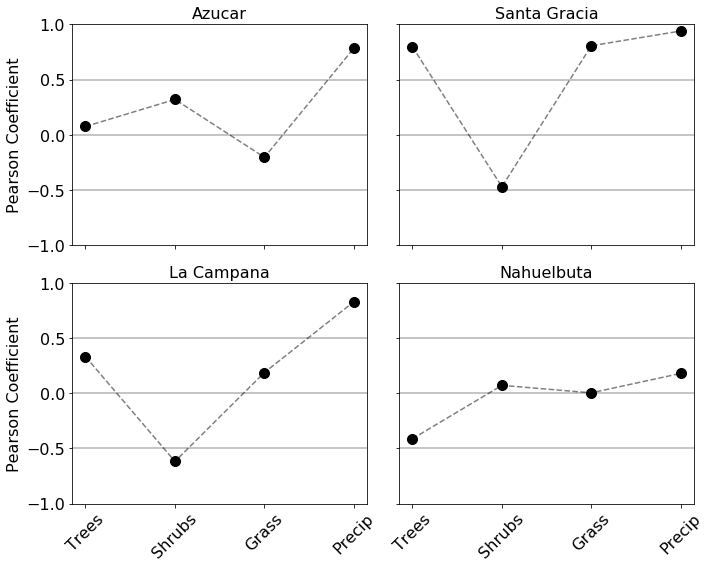

In [231]:
ax1 = [0, 1, 2, 3]
ax1_labels = ['Trees', 'Shrubs', 'Grass', 'Precip']

fig, ax = plt.subplots(nrows = 2, 
                      ncols = 2, 
                      figsize = [10,8],
                      sharex = True, 
                      sharey = True)

ax[0,0].set_title('Azucar', fontsize = 16)
ax[0,1].set_title('Santa Gracia', fontsize = 16)
ax[1,0].set_title('La Campana', fontsize = 16)
ax[1,1].set_title('Nahuelbuta', fontsize = 16)

ax[0,0].plot(ax1,[azucar_erosion_trees_correff_total, azucar_erosion_shrubs_correff_total, azucar_erosion_grass_correff_total, azucar_erosion_rain_correff_total], 'ko', markersize = 10)
ax[0,0].plot(ax1,[azucar_erosion_trees_correff_total, azucar_erosion_shrubs_correff_total, azucar_erosion_grass_correff_total, azucar_erosion_rain_correff_total], 'k--', alpha = 0.5)

ax[0,1].plot(ax1,[santa_gracia_erosion_trees_correff_total, santa_gracia_erosion_shrubs_correff_total, santa_gracia_erosion_grass_correff_total, santa_gracia_erosion_rain_correff_total], 'ko', markersize = 10)
ax[0,1].plot(ax1,[santa_gracia_erosion_trees_correff_total, santa_gracia_erosion_shrubs_correff_total, santa_gracia_erosion_grass_correff_total, santa_gracia_erosion_rain_correff_total], 'k--', alpha = 0.5)

ax[1,0].plot(ax1,[la_campana_erosion_trees_correff_total, la_campana_erosion_shrubs_correff_total, la_campana_erosion_grass_correff_total, la_campana_erosion_rain_correff_total], 'ko', markersize = 10)
ax[1,0].plot(ax1,[la_campana_erosion_trees_correff_total, la_campana_erosion_shrubs_correff_total, la_campana_erosion_grass_correff_total, la_campana_erosion_rain_correff_total], 'k--', alpha = 0.5)

ax[1,1].plot(ax1,[nahuelbuta_erosion_trees_correff_total, nahuelbuta_erosion_shrubs_correff_total, nahuelbuta_erosion_grass_correff_total, nahuelbuta_erosion_rain_correff_total], 'ko', markersize = 10)
ax[1,1].plot(ax1,[nahuelbuta_erosion_trees_correff_total, nahuelbuta_erosion_shrubs_correff_total, nahuelbuta_erosion_grass_correff_total, nahuelbuta_erosion_rain_correff_total], 'k--', alpha = 0.5)

for axs in ax.flatten():
    axs.axes.tick_params(labelsize = 16)
    axs.set_ylim(-1,1)
    axs.set_xticks(x1)
    axs.set_xticklabels(ax1_labels, rotation = 45)
    axs.axhline(0.5, color = 'black', alpha = 0.3)
    axs.axhline(0, color = 'black', alpha = 0.3)
    axs.axhline(-0.5, color = 'black', alpha = 0.3)
    
ax[0,0].set_ylabel('Pearson Coefficient', fontsize = 16)
ax[1,0].set_ylabel('Pearson Coefficient', fontsize = 16)
plt.tight_layout()

plt.savefig('Correlation_Coefficients.png')

#### Coefficient of Variation

In [167]:
from scipy.stats import variation

In [174]:
azucar_trees_cov   = variation(azucar_trees)
azucar_shrubs_cov  = variation(azucar_shrubs)
azucar_grass_cov   = variation(azucar_grass)
azucar_rain_cov    = variation(azucar_rain)
azucar_erosion_cov = variation(azucar_erosion)

santa_gracia_trees_cov  = variation(santa_gracia_trees)
santa_gracia_shrubs_cov = variation(santa_gracia_shrubs)
santa_gracia_grass_cov  = variation(santa_gracia_grass)
santa_gracia_rain_cov   = variation(santa_gracia_rain)
santa_gracia_erosion_cov = variation(santa_gracia_erosion)

la_campana_trees_cov  = variation(la_campana_trees)
la_campana_shrubs_cov = variation(la_campana_shrubs)
la_campana_grass_cov  = variation(la_campana_grass)
la_campana_rain_cov   = variation(la_campana_rain)
la_campana_erosion_cov = variation(la_campana_erosion)

nahuelbuta_trees_cov  = variation(nahuelbuta_trees)
nahuelbuta_shrubs_cov = variation(nahuelbuta_shrubs)
nahuelbuta_grass_cov  = variation(nahuelbuta_grass)
nahuelbuta_rain_cov   = variation(nahuelbuta_rain)
nahuelbuta_erosion_cov = variation(nahuelbuta_erosion)


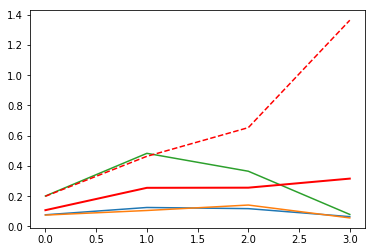

In [224]:
plt.plot([azucar_rain_cov, santa_gracia_rain_cov, la_campana_rain_cov, nahuelbuta_rain_cov])
plt.plot([azucar_erosion_cov, santa_gracia_erosion_cov, la_campana_erosion_cov, nahuelbuta_erosion_cov])
plt.plot([azucar_trees_cov, santa_gracia_trees_cov, la_campana_trees_cov, nahuelbuta_trees_cov])
plt.plot([azucar_grass_cov, santa_gracia_grass_cov, la_campana_grass_cov, nahuelbuta_grass_cov], 'r', linewidth = 2)
plt.plot([azucar_shrubs_cov, santa_gracia_shrubs_cov, la_campana_shrubs_cov, nahuelbuta_shrubs_cov], 'r--')
